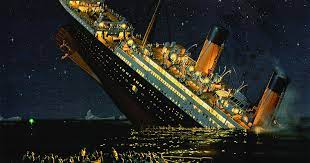

# Importing librarires


In [1]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,classification_report
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from scipy import stats


# Importing Data


In [2]:
df_train = pd.read_csv('train.csv')

# Getting fimiliar with data

In [3]:
df_train.shape

(891, 12)

In [4]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Data set is almost balaned
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


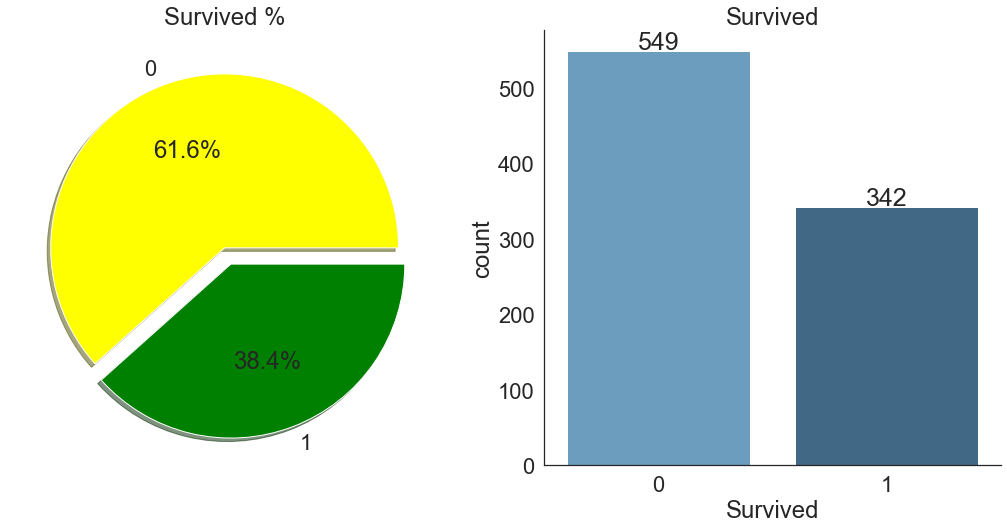

In [9]:
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['yellow', 'green'])
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1], palette='Blues_d')
ax[1].set_title('Survived')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 25)
sns.despine()

In [10]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891,NaN,NaN,NaN,446,257.354,1,223.5,446,668.5,891
Survived,891,NaN,NaN,NaN,0.383838,0.486592,0,0,0,1,1
Pclass,891,NaN,NaN,NaN,2.30864,0.836071,1,2,3,3,3
Name,891,891,"Van Impe, Mr. Jean Baptiste",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714,NaN,NaN,NaN,29.6991,14.5265,0.42,20.125,28,38,80
SibSp,891,NaN,NaN,NaN,0.523008,1.10274,0,0,0,1,8
Parch,891,NaN,NaN,NaN,0.381594,0.806057,0,0,0,0,6
Ticket,891,681,1601,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891,NaN,NaN,NaN,32.2042,49.6934,0,7.9104,14.4542,31,512.329


In [11]:
def no_of_uniqu_values(df,n='none'):
    '''
     N is threshhold , if define then this function just return the variables having uniqn number less than n 
     otherwise returns all varibales with nomber of uniqu values
     Example : 
         no_of_uniqu_values(df)
         no_of_uniqu_values(df,5)
    '''
    for i in range(df.shape[1]):
        if (n!='none') :
            if(df[df.columns[i]].nunique()<n):
                print('\nNumber of uniqe values for variable {0} is : {1} '.format(df.columns[i] ,df[df.columns[i]].nunique()))
        else :
            print('Number of uniqe values for variable {0} is : {1} '.format(df.columns[i] ,df[df.columns[i]].nunique()))
   

In [12]:
no_of_uniqu_values(df_train)

Number of uniqe values for variable PassengerId is : 891 
Number of uniqe values for variable Survived is : 2 
Number of uniqe values for variable Pclass is : 3 
Number of uniqe values for variable Name is : 891 
Number of uniqe values for variable Sex is : 2 
Number of uniqe values for variable Age is : 88 
Number of uniqe values for variable SibSp is : 7 
Number of uniqe values for variable Parch is : 7 
Number of uniqe values for variable Ticket is : 681 
Number of uniqe values for variable Fare is : 248 
Number of uniqe values for variable Cabin is : 147 
Number of uniqe values for variable Embarked is : 3 


# Univariate analysis

# Numerical features

In [13]:
# Befor doing Univariate analysis , first as we dont need features 'Name','Ticket','PassengerId' , so we drop them 
df_train.drop(columns = ['Name','Ticket','PassengerId'],inplace = True)

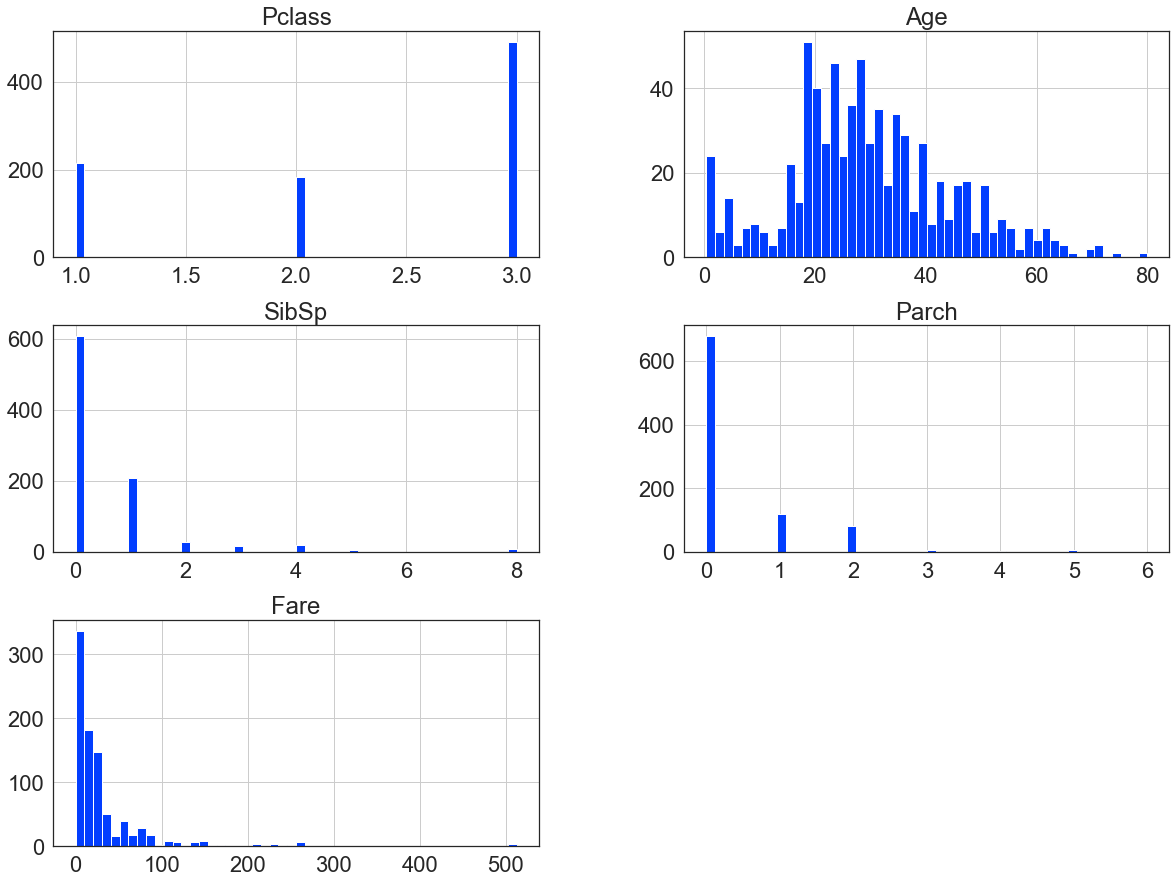

In [14]:
df_train.drop('Survived',axis=1).hist(bins=50, figsize=(20,15))
plt.show()

# Categorical features

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


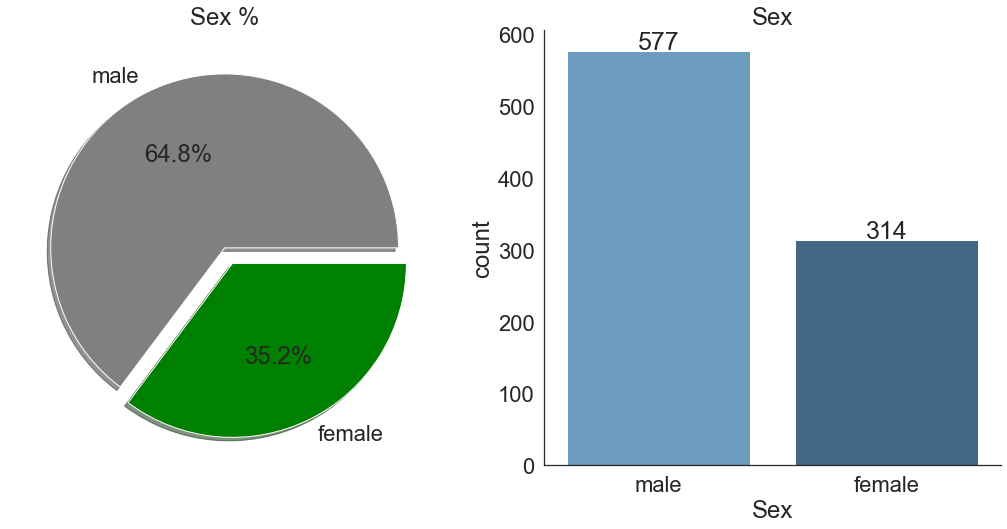

In [15]:
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Sex'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Sex %')
ax[0].set_ylabel('')
sns.countplot('Sex', data = df_train, ax = ax[1], palette='Blues_d')
ax[1].set_title('Sex')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 25)
sns.despine()

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


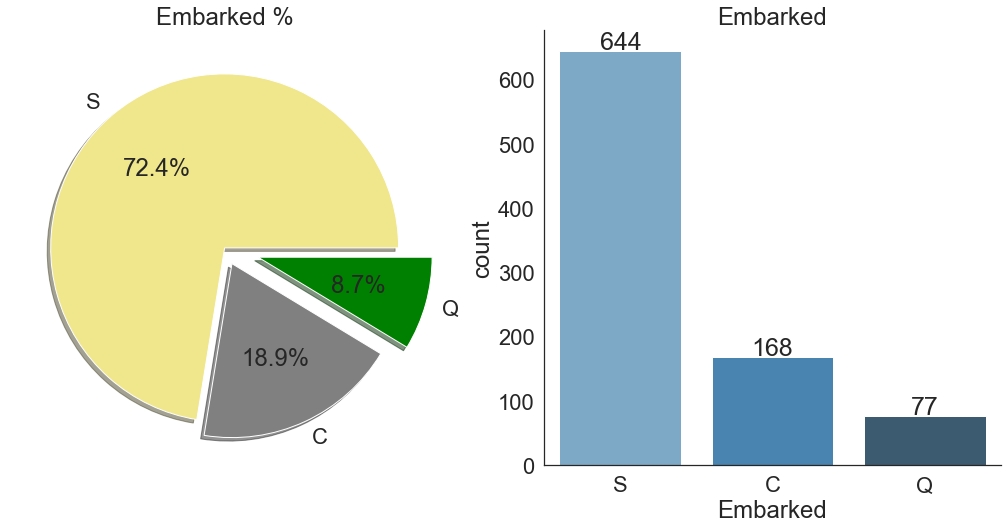

In [578]:
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Embarked'].value_counts().plot.pie(explode = [0, 0.1,0.2], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['khaki','grey', 'green'])
ax[0].set_title('Embarked %')
ax[0].set_ylabel('')
sns.countplot('Embarked', data = df_train, ax = ax[1], palette='Blues_d')
ax[1].set_title('Embarked')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 25)
sns.despine()



# """ Data Cleansing"""

# manage dublicated values

In [16]:
df_train.duplicated().sum()

107

In [17]:
df_train.drop_duplicates(inplace=True)

In [18]:
df_train.duplicated().sum()

0

# Handling with miss values

In [19]:
pd.isnull(df_train).sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Cabin       581
Embarked      2
dtype: int64

<AxesSubplot:>

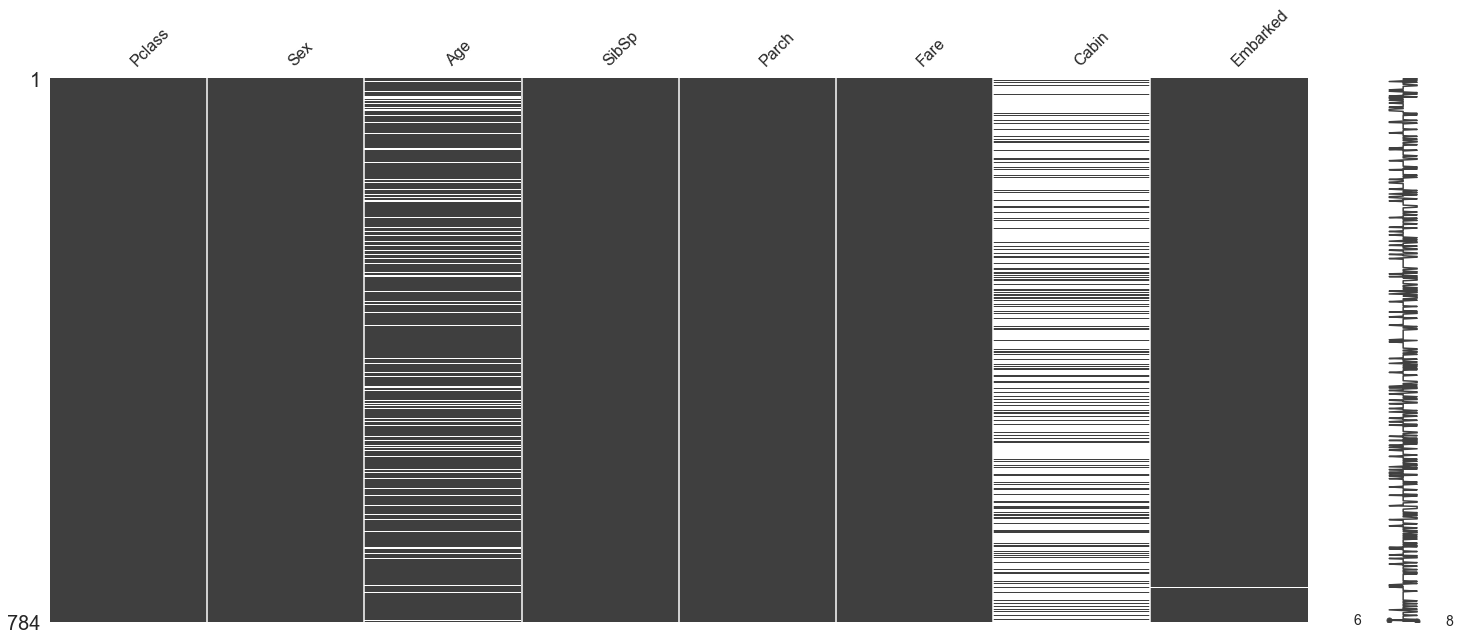

In [20]:
# with this visualization we can see how missing values are distributed in age column
import missingno as msno
msno.matrix(df_train.drop(['Survived'],axis=1))

In [21]:
# cabin is not a good feature for us because more than 50% is null
df_train = df_train.dropna(thresh = 400,axis = 1)#axis = o-> row
#df_train.drop(columns = ['Cabin'],inplace = True)

In [22]:
# Embarked has 2 miss values so we decided to use Ffill approach to impute them 

nulle = pd.isnull(df_train['Embarked'])

df_train[nulle]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [23]:
df_train.iloc[59:62]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
60,0,3,male,22.0,0,0,7.2292,C
61,1,1,female,38.0,0,0,80.0000,NaN
62,0,1,male,45.0,1,0,83.4750,S


In [24]:
df_train['Embarked']=df_train['Embarked'].fillna(method='ffill')

In [25]:
# we can see here , index# 61 has been imputed
df_train.iloc[59:62]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
60,0,3,male,22.0,0,0,7.2292,C
61,1,1,female,38.0,0,0,80.0000,C
62,0,1,male,45.0,1,0,83.4750,S


In [26]:
pd.isnull(df_train).sum()

Survived      0
Pclass        0
Sex           0
Age         106
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [27]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


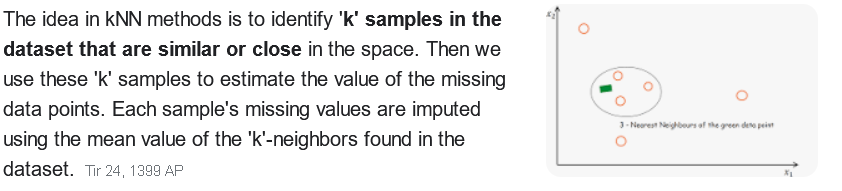

# Before using KNNImputer to impute feature Age , we first Encode data

# Encoding Variables

In [28]:
df_train['Embarked'].value_counts()

S    568
C    156
Q     60
Name: Embarked, dtype: int64

In [29]:
# Here we encode Embarked using dummy approach 

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df


df_encoded = dummies('Embarked',df_train)

In [30]:
df_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,male,22.0,1,0,7.2500,0,1
1,1,1,female,38.0,1,0,71.2833,0,0
2,1,3,female,26.0,0,0,7.9250,0,1
3,1,1,female,35.0,1,0,53.1000,0,1
4,0,3,male,35.0,0,0,8.0500,0,1


In [31]:
# Encode Sex using maping
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 1, 'female': 0})

In [32]:
df_encoded.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1
5,0,3,1,NaN,0,0,8.4583,1,0
6,0,1,1,54.0,0,0,51.8625,0,1
7,0,3,1,2.0,3,1,21.0750,0,1
8,1,3,0,27.0,0,2,11.1333,0,1
9,1,2,0,14.0,1,0,30.0708,0,0


In [33]:
# all are int or float
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  784 non-null    int64  
 1   Pclass    784 non-null    int64  
 2   Sex       784 non-null    int64  
 3   Age       678 non-null    float64
 4   SibSp     784 non-null    int64  
 5   Parch     784 non-null    int64  
 6   Fare      784 non-null    float64
 7   Q         784 non-null    uint8  
 8   S         784 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 50.5 KB


In [34]:
# now we can use KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

df_filled = imputer.fit_transform(df_encoded)


In [35]:
df_filled = pd.DataFrame(data=df_filled,columns=df_encoded.columns)

In [36]:
df_filled

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
779,0.0,3.0,0.0,39.0,0.0,5.0,29.1250,1.0,0.0
780,1.0,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,1.0
781,0.0,3.0,0.0,26.8,1.0,2.0,23.4500,0.0,1.0
782,1.0,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0


# Function to rename all columns in encoded data to original names
def change_name_columns(df_old,df_new):
    name_columns=list(df_old.columns)
    df_new.columns=name_columns
    return df_new
df_filled=change_name_columns(df_encoded,df)

In [37]:
pd.isnull(df_filled).sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


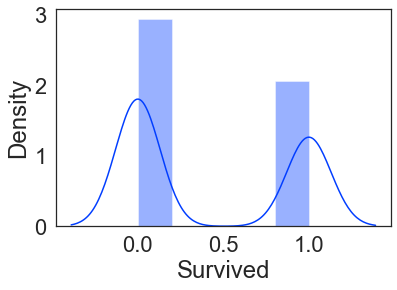

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


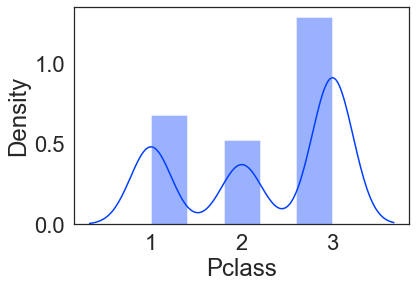

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


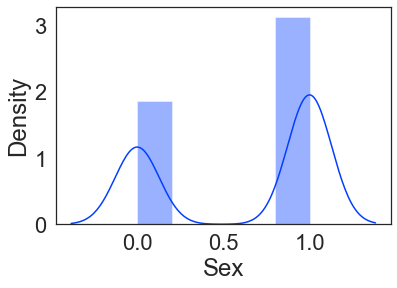

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


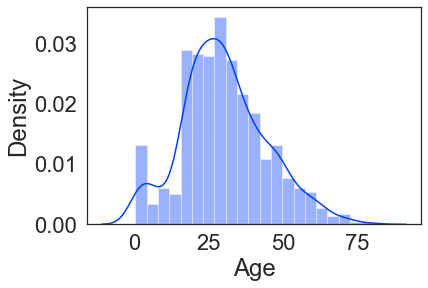

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


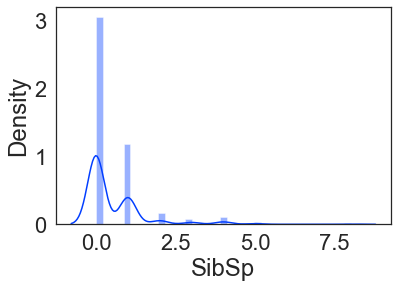

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


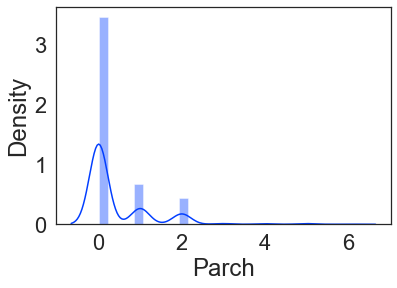

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


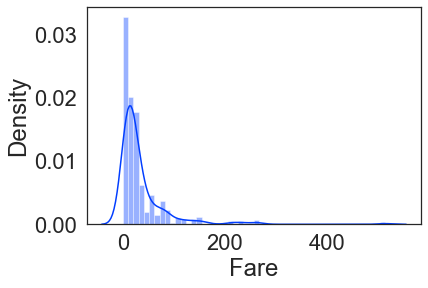

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


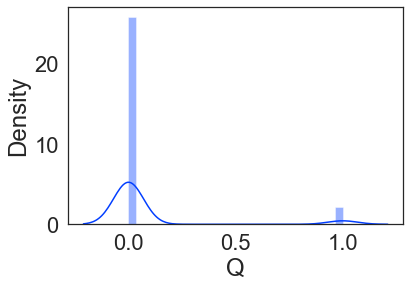

C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


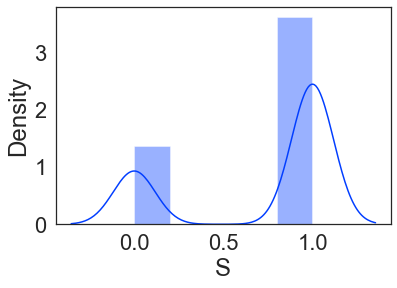

In [38]:
data_feature = df_filled.columns
for i in data_feature:
    p = sns.distplot(a = df_filled[i])
    plt.show()

# Handling Outlier:LOF

# Here We apply LOF for find and delete anomaly rows 

In [42]:
from sklearn.neighbors import LocalOutlierFactor
def outlier_detection(df):
    x = df.drop("Survived", axis=1)
    y = df.Survived
    lof = LocalOutlierFactor(n_neighbors = 10, metric= "euclidean") #or manhattan

    res = lof.fit_predict(x)
    print(res)
    x_o = x[res != -1]
    y_o = y[res != -1]
    df = pd.concat([x_o, y_o], axis=1)
    return df

df_cleaned= outlier_detection(df_filled)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

In [43]:
df_cleaned.shape

(756, 9)

In [44]:
df_filled.shape

(784, 9)

In [46]:
df_cleaned

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,1.0,0.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,0.0,1.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,0.0,1.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
779,3.0,0.0,39.0,0.0,5.0,29.1250,1.0,0.0,0.0
780,1.0,0.0,19.0,0.0,0.0,30.0000,0.0,1.0,1.0
781,3.0,0.0,26.8,1.0,2.0,23.4500,0.0,1.0,0.0
782,1.0,1.0,26.0,0.0,0.0,30.0000,0.0,0.0,1.0


In [47]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 783
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    756 non-null    float64
 1   Sex       756 non-null    float64
 2   Age       756 non-null    float64
 3   SibSp     756 non-null    float64
 4   Parch     756 non-null    float64
 5   Fare      756 non-null    float64
 6   Q         756 non-null    float64
 7   S         756 non-null    float64
 8   Survived  756 non-null    float64
dtypes: float64(9)
memory usage: 59.1 KB


In [48]:
df_cleaned.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Q', 'S', 'Survived'], dtype='object')

# Data Scaling

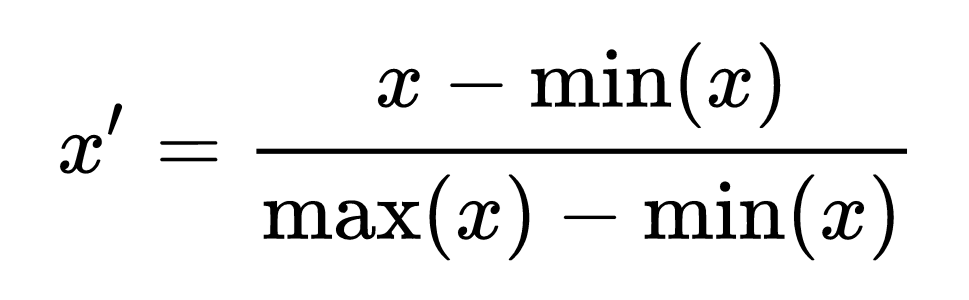

In [49]:
need = ['Pclass','Age','SibSp','Parch','Fare']
scaler = MinMaxScaler()
df_cleaned[need]=scaler.fit_transform(df_cleaned[need])


In [50]:
df_cleaned.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S,Survived
0,1.0,1.0,0.293286,0.125,0.000000,0.003943,0.0,1.0,0.0
1,0.0,0.0,0.510737,0.125,0.000000,0.253331,0.0,0.0,1.0
2,1.0,0.0,0.347649,0.000,0.000000,0.006572,0.0,1.0,1.0
3,0.0,0.0,0.469965,0.125,0.000000,0.182513,0.0,1.0,1.0
4,1.0,1.0,0.469965,0.000,0.000000,0.007059,0.0,1.0,0.0
5,1.0,1.0,0.643925,0.000,0.000000,0.008649,1.0,0.0,0.0
6,0.0,1.0,0.728187,0.000,0.000000,0.177693,0.0,1.0,0.0
7,1.0,1.0,0.021473,0.375,0.166667,0.057787,0.0,1.0,0.0
8,1.0,0.0,0.361239,0.000,0.333333,0.019067,0.0,1.0,1.0
9,0.5,0.0,0.184561,0.125,0.000000,0.092822,0.0,0.0,1.0


C:\Users\Saeed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


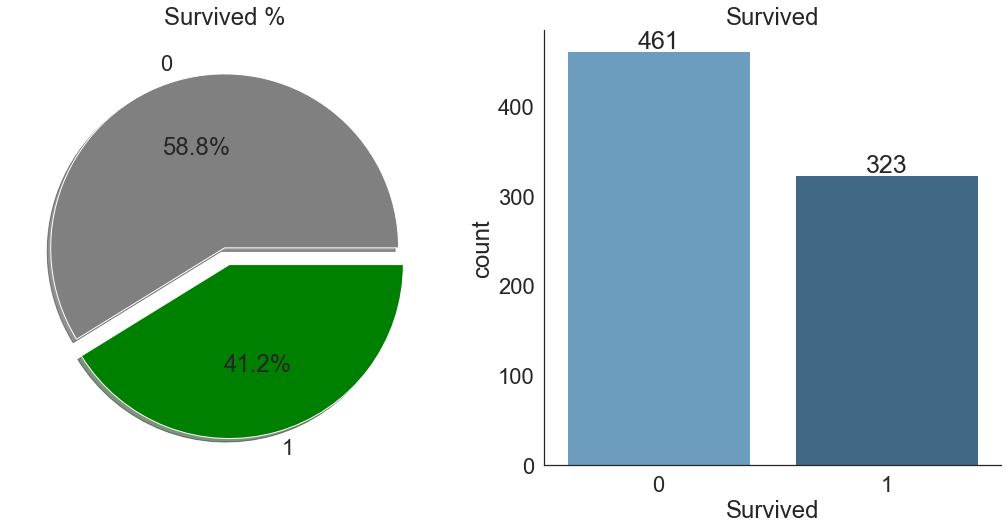

In [51]:
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1], palette='Blues_d')
ax[1].set_title('Survived')
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 25)
sns.despine()

# Correlation Section

Text(0.5, 1.0, 'Correlation Plot')

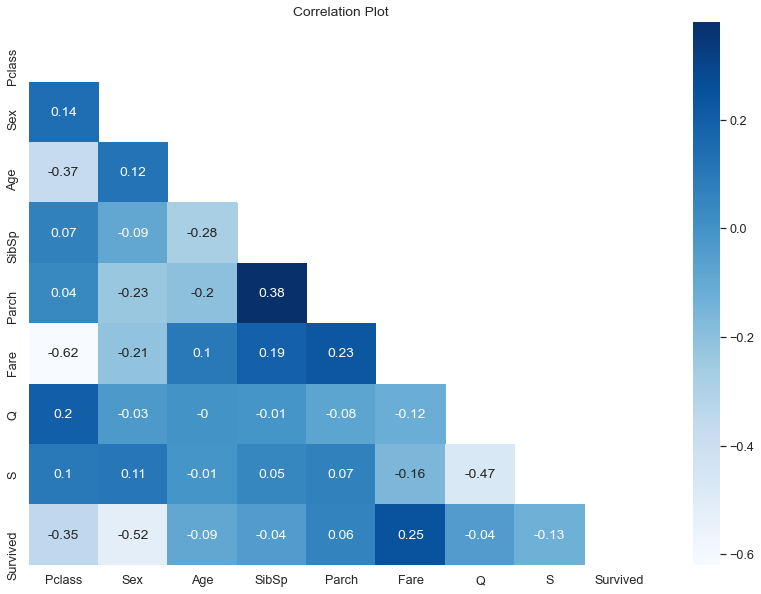

In [52]:
corr=df_cleaned.corr().round(2)

t

In [53]:
# Feature Selection

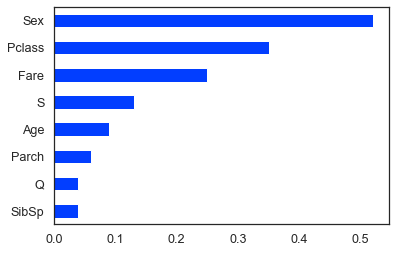

In [54]:
abs(corr['Survived']).sort_values()[:-1].plot.barh()
plt.gca().set_facecolor('#FFFFFF')

In [55]:
# because Parch,Q and SibSp has low corr with survival rate, hence we drop them
def drop_features(df):
    df.drop(['SibSp','Q','Parch'],
            axis=1,
            inplace=True)
    return df

titanic_df = drop_features(df_cleaned)

In [56]:
titanic_df

,Pclass,Sex,Age,Fare,S,Survived
0,1.0,1.0,0.293286,0.003943,1.0,0.0
1,0.0,0.0,0.510737,0.253331,0.0,1.0
2,1.0,0.0,0.347649,0.006572,1.0,1.0
3,0.0,0.0,0.469965,0.182513,1.0,1.0
4,1.0,1.0,0.469965,0.007059,1.0,0.0
...,...,...,...,...,...,...
779,1.0,0.0,0.524327,0.089139,0.0,0.0
780,0.0,0.0,0.252514,0.092547,1.0,1.0
781,1.0,0.0,0.358521,0.067037,1.0,0.0
782,0.0,1.0,0.347649,0.092547,0.0,1.0


<Figure size 1008x720 with 0 Axes>

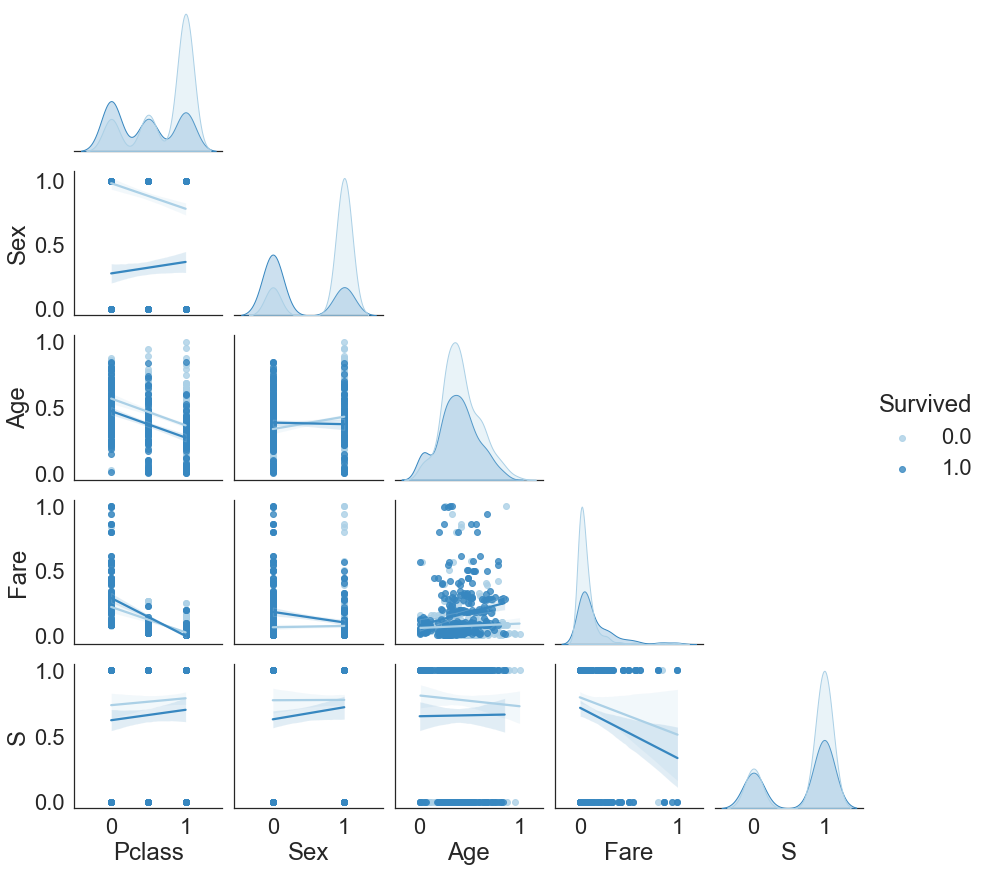

In [57]:
sns.set(font_scale=2)
plt.figure(figsize=(14, 10))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(titanic_df,kind = 'reg',corner = True,palette ='Blues',hue='Survived' )

# <center> ======================================================= </center>

In [58]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 0 to 783
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    756 non-null    float64
 1   Sex       756 non-null    float64
 2   Age       756 non-null    float64
 3   Fare      756 non-null    float64
 4   S         756 non-null    float64
 5   Survived  756 non-null    float64
dtypes: float64(6)
memory usage: 41.3 KB


In [59]:
titanic_df

,Pclass,Sex,Age,Fare,S,Survived
0,1.0,1.0,0.293286,0.003943,1.0,0.0
1,0.0,0.0,0.510737,0.253331,0.0,1.0
2,1.0,0.0,0.347649,0.006572,1.0,1.0
3,0.0,0.0,0.469965,0.182513,1.0,1.0
4,1.0,1.0,0.469965,0.007059,1.0,0.0
...,...,...,...,...,...,...
779,1.0,0.0,0.524327,0.089139,0.0,0.0
780,0.0,0.0,0.252514,0.092547,1.0,1.0
781,1.0,0.0,0.358521,0.067037,1.0,0.0
782,0.0,1.0,0.347649,0.092547,0.0,1.0


# <center>Modeling</center>

## Define X and Y 

In [60]:
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [62]:
def models(col,tr_score,te_score) :
#     print(score)
    entry = {"Train Score" : tr_score , "Test Score" :te_score }
    return pd.DataFrame(entry,index=[col])
    

### Multinomial Naive Bayes

In [63]:
MNB = MultinomialNB()
scores_train_MNB = cross_val_score(MNB, X_train , y_train , cv =10 , scoring = 'accuracy')
scores_test_MNB = cross_val_score(MNB, X_test , y_test , cv =10 , scoring = 'accuracy')
print('Train accuracy score  : {0}  \nTest accuracy score  :  {1}'.format(scores_train_MNB.mean(),scores_test_MNB.mean()))
result1 = models('MultinomialNB',scores_train_MNB.mean(),scores_test_MNB.mean())

Train accuracy score  : 0.6969672131147541  
Test accuracy score  :  0.7641666666666667


## Gaussian Naive Bayes

###  which is a variant of the Naive Bayes algorithm specifically designed for classification tasks when dealing with continuous-valued features that are assumed to follow a Gaussian (normal) distribution

In [64]:
GNB = GaussianNB()
scores_train_GNB = cross_val_score(GNB,X_train , y_train, cv =10 , scoring = 'accuracy')
scores_test_GNB = cross_val_score(GNB,X_test , y_test, cv =10 , scoring = 'accuracy')
print('Train accuracy score  : {0}  \nTest accuracy score  :  {1}'.format(scores_train_GNB.mean(),scores_test_GNB.mean()))

result2 = models('GaussianNB',scores_train_GNB.mean(),scores_test_GNB.mean())

Train accuracy score  : 0.7730874316939891  
Test accuracy score  :  0.7975


# LogisticRegression

In [65]:
def get_clf_eval(y_test, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion) 
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}'.format(accuracy, precision, recall, f1))
    return confusion

In [66]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Evaluate with Prevoius Test
y_pred=logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)
y_pred

#Let's look at some other scores as well
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86        81
         1.0       0.87      0.77      0.82        71

    accuracy                           0.84       152
   macro avg       0.85      0.84      0.84       152
weighted avg       0.84      0.84      0.84       152



In [67]:
print(classification_report(y_train,logreg.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       360
         1.0       0.72      0.69      0.71       244

    accuracy                           0.77       604
   macro avg       0.76      0.76      0.76       604
weighted avg       0.77      0.77      0.77       604



In [68]:
LR_train_accuracy_score =accuracy_score(y_train,logreg.predict(X_train))
# print('train_accuracy_score =')
# LR_train_accuracy_score

LR_test_accuracy_score =accuracy_score(y_test,y_pred)
# print('test_accuracy_score =')
# LR_test_accuracy_score

print('Train accuracy score  : {0}  \nTest accuracy score  :  {1}'.format(LR_train_accuracy_score,LR_test_accuracy_score))

result3 = models('Logistic Regression',LR_train_accuracy_score,LR_test_accuracy_score)

Train accuracy score  : 0.7682119205298014  
Test accuracy score  :  0.8421052631578947


In [69]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix#128/152= 0.8421


array([[73,  8],
       [16, 55]], dtype=int64)

<AxesSubplot:>

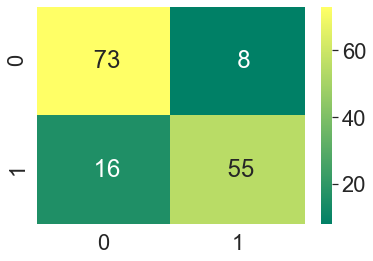

In [70]:
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")

In [71]:
confusion = get_clf_eval(y_test, pred=y_pred)

confusion matrix
[[73  8]
 [16 55]]
accuracy: 0.8421, precision: 0.8730, recall: 0.7746,    F1: 0.8209


# RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
RF_train_accuracy_score = random_forest.score(X_train, y_train)
RF_test_accuracy_score =random_forest.score(X_test, y_test)


print('Train accuracy score  : {0}  \nTest accuracy score  :  {1}'.format(RF_train_accuracy_score,RF_test_accuracy_score))
result4 = models('Random Forest Classifier',RF_train_accuracy_score,RF_test_accuracy_score)

Train accuracy score  : 0.9884105960264901  
Test accuracy score  :  0.7631578947368421


In [73]:
Result = pd.concat([result1,result2,result3,result4])
Result.round(4)

,Train Score,Test Score
MultinomialNB,0.6970,0.7642
GaussianNB,0.7731,0.7975
Logistic Regression,0.7682,0.8421
Random Forest Classifier,0.9884,0.7632
